In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
train_data_dir =  r"C:\Users\Samson\Desktop\ethiopian cofee leaf dataset\ethiopian cofee leaf dataset\train"


In [3]:
#C_N means class_name
C_N = sorted(os.listdir(train_data_dir))
C_N

['Cerscospora', 'Healthy', 'Leaf rust', 'Phoma']

In [4]:
IMG_SIZE = (256, 256) 

train_datagen = ImageDataGenerator(
                                    rescale=1/255.0,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.1)  


In [5]:
train_gen = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training')

Found 9720 images belonging to 4 classes.


In [6]:
val_gen = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 1080 images belonging to 4 classes.


In [7]:
def display_random_images(data, class_names, num_images=12, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    
    
    data_iter = iter(data)

    for i in range(num_images):
        images, labels = next(data_iter)
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[0]) 
        plt.title(class_names[np.argmax(labels[0])])
        plt.axis('off')  

    plt.show()

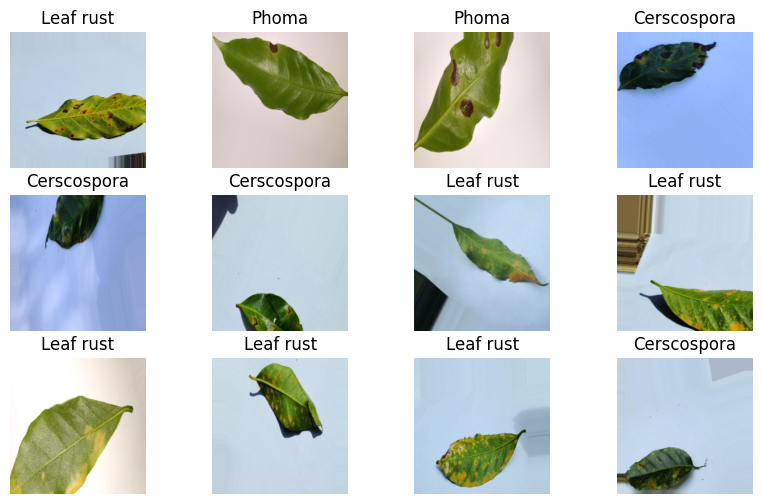

In [9]:
display_random_images(train_gen, class_names=C_N)

In [10]:
# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary() 

c:\Users\Samson\Desktop\fruit_detection\fruit_detection\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Creating the optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the specified optimizer and loss function

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
import warnings
from PIL import Image
from keras.callbacks import EarlyStopping

# Set a higher threshold for the decompression bomb warning
warnings.filterwarnings("ignore", category=Image.DecompressionBombWarning)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    x=train_gen,
    epochs=5,
    verbose=1,
    steps_per_epoch=len(train_gen),
    validation_data=val_gen,
    validation_steps=len(val_gen),
    callbacks=[early_stopping]  
)

c:\Users\Samson\Desktop\fruit_detection\fruit_detection\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 883s 3s/step - accuracy: 0.6665 - loss: 1.0169 - val_accuracy: 0.7417 - val_loss: 0.6176
Epoch 2/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 808s 3s/step - accuracy: 0.8408 - loss: 0.4207 - val_accuracy: 0.8074 - val_loss: 0.4600
Epoch 3/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 2297s 8s/step - accuracy: 0.8632 - loss: 0.3444 - val_accuracy: 0.8370 - val_loss: 0.4180
Epoch 4/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 1126s 4s/step - accuracy: 0.8916 - loss: 0.2956 - val_accuracy: 0.8500 - val_loss: 0.3603
Epoch 5/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 1112s 4s/step - accuracy: 0.9228 - loss: 0.2273 - val_accuracy: 0.9306 - val_loss: 0.2118


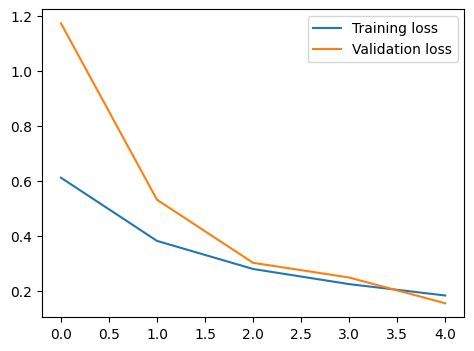

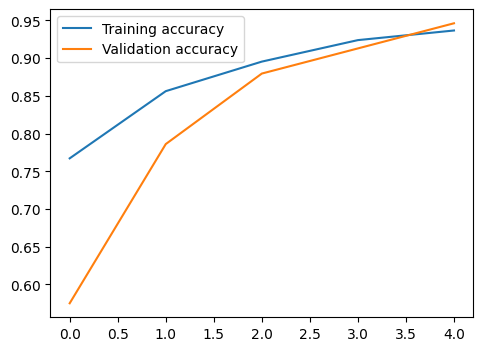

In [14]:
# plot the loss

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()


In [47]:
model.save('final_code.keras')


In [ ]:
test_data_dir =  r"C:\Users\Samson\Desktop\ethiopian cofee leaf dataset\ethiopian cofee leaf dataset\test" 

In [36]:
IMG_SIZE = (256, 256)
test_datagen = ImageDataGenerator(
                                   rescale=1/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
test_gen = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False)  

Found 1200 images belonging to 4 classes.


In [32]:
from tensorflow.keras.models import load_model

loaded_model = load_model('final_code.keras')
loaded_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,518,478 (169.82 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,678,986 (113.22 MB)

In [38]:
results = loaded_model.evaluate(test_gen)

# Display the results
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9793 - loss: 0.0764
Test Loss: 0.1559930145740509
Test Accuracy: 0.9458333253860474


In [39]:
test_steps_per_epoch = np.ceil(test_gen.samples / test_gen.batch_size).astype(int)

# Predict classes
predictions = model.predict(test_gen, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions,axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step


In [40]:
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

28/38 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step

c:\Users\dell\Desktop\fruit_detection\fruit_detection\env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step
Confusion Matrix (NumPy Array):
[[300   0   0   0]
 [  0 300   0   0]
 [ 16  35 249   0]
 [  1   8   3 288]]


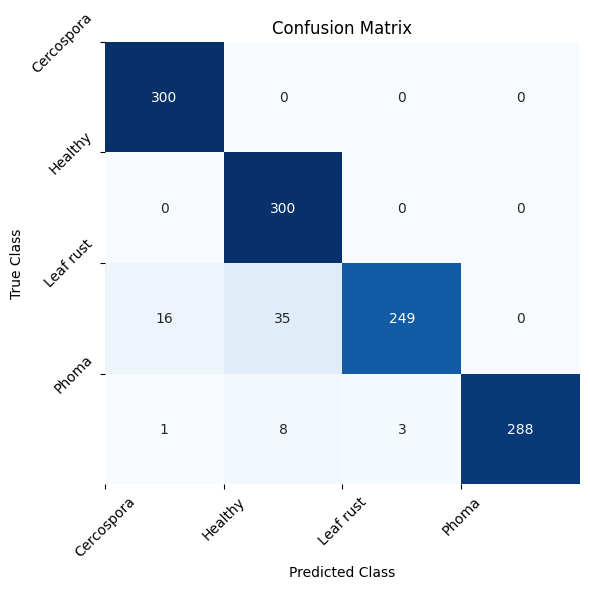

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_probs = loaded_model.predict(test_gen, steps=len(test_gen))
y_pred = np.argmax(y_pred_probs, axis=1)  
y_true = test_gen.classes  
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix as a NumPy array
print("Confusion Matrix (NumPy Array):")
print(cm)

# Visualize the confusion matrix with class names
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)

# Set class names as tick labels
class_names = ["Cercospora", "Healthy", "Leaf rust", "Phoma"]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names, rotation=45)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()

In [45]:
# Generate a detailed classification report
detailed_report = classification_report(y_true, y_pred, target_names=class_names)

# Print the classification report for analysis
print("Classification Report:")
print(detailed_report)

Classification Report:
              precision    recall  f1-score   support

  Cercospora       0.95      1.00      0.97       300
     Healthy       0.87      1.00      0.93       300
   Leaf rust       0.99      0.83      0.90       300
       Phoma       1.00      0.96      0.98       300

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



In [59]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Updated `predict_images` function
def predict_images(data, class_names, model, num_images=12, figsize=(10, 6)):
    plt.figure(figsize=figsize)

    for i in range(num_images):
        # Fetch a batch of data
        images, labels = next(iter(data))
        id = np.random.randint(len(images))  # Randomly select an image
        img = tf.expand_dims(images[id], axis=0)  # Expand dims for model input

        plt.subplot(3, 4, i + 1)  # Create subplot grid
        plt.imshow(images[id])  # Display the image directly

        # Predict using the model
        prediction_probs = model.predict(img)[0]
        predicted_index = np.argmax(prediction_probs)
        predicted_label = class_names[predicted_index]
        predicted_confidence = prediction_probs[predicted_index] * 100  # Confidence in %

        # Get the actual label
        actual_label = class_names[np.argmax(labels[id])]

        # Title color based on prediction correctness
        title_color = "green" if predicted_label == actual_label else "red"

        # Set title with prediction details
        plt.title(
            f"Actual: {actual_label}\n"
            f"Predicted: {predicted_label} ({predicted_confidence:.2f}%)",
            fontsize=10,
            color=title_color,
        )
        plt.axis("off")  # Hide axes

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


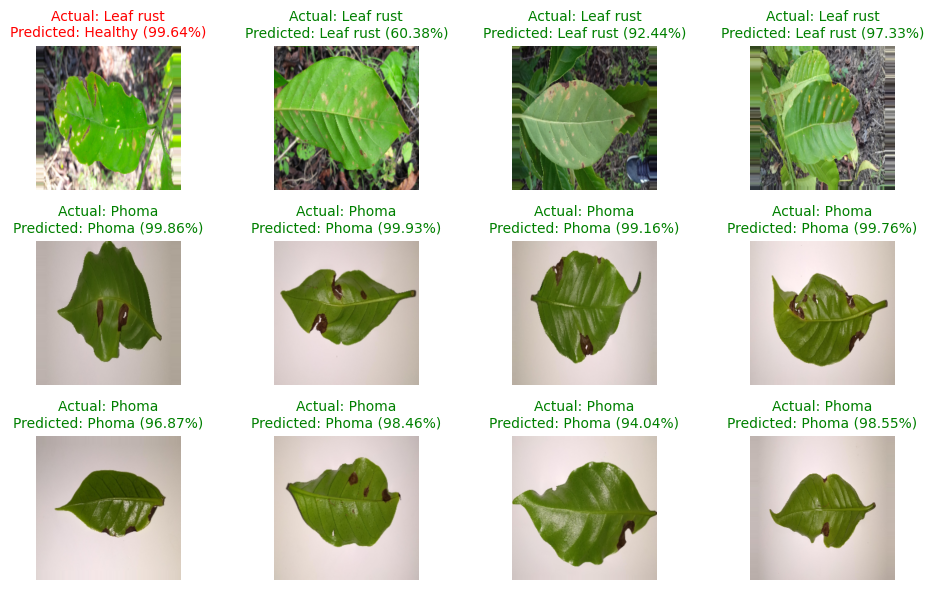

In [60]:
predict_images(test_gen, class_names, model)

In [51]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('final_code.keras')

# Function to preprocess the image for prediction
def preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img = img.resize((256, 256))  # Updated size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array

# Function to predict the disease and print the image
def predict_and_print(image_path, model):
    img = preprocess_image(image_path)
    prediction = model.predict(img)

    # Assuming you have a list of class names
    class_names = ["Cerscospora", "Healthy", "Leaf rust", "Phoma"]  # Replace with your actual class names
    predicted_class = class_names[np.argmax(prediction)]

    # Print the predicted class
    print(f"It is a {predicted_class} Cofee Leaf Disase")

    # Display the image
    plt.imshow(Image.open(image_path))
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()

c:\Users\dell\Desktop\fruit_detection\fruit_detection\env\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
It is a Leaf rust Cofee Leaf Disase


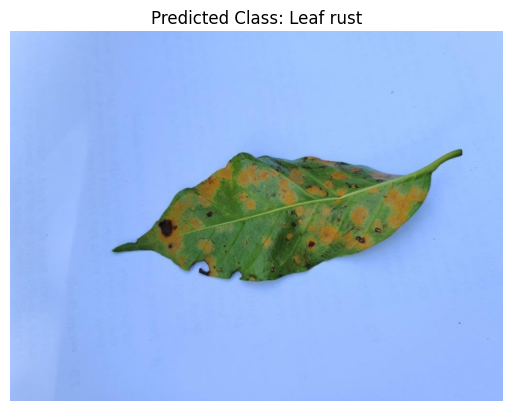

In [ ]:
image_path_to_predict = r'C:\Users\Samson\Desktop\ethiopian cofee leaf dataset\ethiopian cofee leaf dataset\test\Leaf rust/20231123_103017.jpg'
predict_and_print(image_path_to_predict, model)

In [ ]:
import os
import glob

# Define the pattern for images in subdirectories
path_pattern = r"C:\Users\Samson\Desktop\ethiopian cofee leaf dataset\ethiopian cofee leaf dataset\test/**/*.jpg"

# Debug: Check if the main directory exists
print("Directory exists:", os.path.exists(r"C:\Users\Samson\Desktop\ethiopian cofee leaf dataset\ethiopian cofee leaf dataset\test"))

# Use glob to get all matching file paths
filepaths = glob.glob(path_pattern, recursive=True)

# Print the first 10 file paths
print("Found files:", filepaths[:2])



Directory exists: True
Found files: ['C:\\Users\\dell\\Desktop\\archive\\ethiopian cofee leaf dataset\\test\\Cerscospora\\20231123_102720 (2).jpg', 'C:\\Users\\dell\\Desktop\\archive\\ethiopian cofee leaf dataset\\test\\Cerscospora\\20231123_102724 (2).jpg']


In [54]:
import pandas as pd
import numpy as np

# Ensure y_true and y_pred are integer class indices
y_true = np.argmax(y_true, axis=1) if len(y_true.shape) > 1 else np.array(y_true, dtype=int)
y_pred = np.argmax(y_pred, axis=1) if len(y_pred.shape) > 1 else np.array(y_pred, dtype=int)

# Validate lengths
if len(filepaths) != len(y_true):
    raise ValueError("Number of file paths does not match number of true labels!")

# Create the DataFrame
pred_df = pd.DataFrame({
    "image_path": filepaths,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_conf": y_pred_probs.max(axis=1),  # Max confidence for predictions
    "y_true_classname": [class_names[i] for i in y_true],
    "y_pred_classname": [class_names[i] for i in y_pred]
})

# Display the DataFrame
print(pred_df)


                                             image_path  y_true  y_pred  \
0     C:\Users\dell\Desktop\archive\ethiopian cofee ...       0       0   
1     C:\Users\dell\Desktop\archive\ethiopian cofee ...       0       0   
2     C:\Users\dell\Desktop\archive\ethiopian cofee ...       0       0   
3     C:\Users\dell\Desktop\archive\ethiopian cofee ...       0       0   
4     C:\Users\dell\Desktop\archive\ethiopian cofee ...       0       0   
...                                                 ...     ...     ...   
1195  C:\Users\dell\Desktop\archive\ethiopian cofee ...       3       3   
1196  C:\Users\dell\Desktop\archive\ethiopian cofee ...       3       1   
1197  C:\Users\dell\Desktop\archive\ethiopian cofee ...       3       3   
1198  C:\Users\dell\Desktop\archive\ethiopian cofee ...       3       1   
1199  C:\Users\dell\Desktop\archive\ethiopian cofee ...       3       3   

      pred_conf y_true_classname y_pred_classname  
0      0.968773       Cercospora       Cercospo

In [55]:
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

,image_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,C:\Users\dell\Desktop\archive\ethiopian cofee ...,0,0,0.968773,Cercospora,Cercospora,True
1,C:\Users\dell\Desktop\archive\ethiopian cofee ...,0,0,0.989067,Cercospora,Cercospora,True
2,C:\Users\dell\Desktop\archive\ethiopian cofee ...,0,0,0.997635,Cercospora,Cercospora,True
3,C:\Users\dell\Desktop\archive\ethiopian cofee ...,0,0,0.999737,Cercospora,Cercospora,True
4,C:\Users\dell\Desktop\archive\ethiopian cofee ...,0,0,0.996851,Cercospora,Cercospora,True


In [56]:
top_wrong_pred = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_wrong_pred.head(10)

,image_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
797,C:\Users\dell\Desktop\archive\ethiopian cofee ...,2,1,0.998489,Leaf rust,Healthy,False
912,C:\Users\dell\Desktop\archive\ethiopian cofee ...,3,0,0.997138,Phoma,Cercospora,False
758,C:\Users\dell\Desktop\archive\ethiopian cofee ...,2,0,0.997054,Leaf rust,Cercospora,False
722,C:\Users\dell\Desktop\archive\ethiopian cofee ...,2,0,0.992818,Leaf rust,Cercospora,False
815,C:\Users\dell\Desktop\archive\ethiopian cofee ...,2,1,0.992250,Leaf rust,Healthy,False
883,C:\Users\dell\Desktop\archive\ethiopian cofee ...,2,1,0.988028,Leaf rust,Healthy,False
812,C:\Users\dell\Desktop\archive\ethiopian cofee ...,2,1,0.984577,Leaf rust,Healthy,False
853,C:\Users\dell\Desktop\archive\ethiopian cofee ...,2,1,0.973353,Leaf rust,Healthy,False
873,C:\Users\dell\Desktop\archive\ethiopian cofee ...,2,1,0.968153,Leaf rust,Healthy,False
644,C:\Users\dell\Desktop\archive\ethiopian cofee ...,2,0,0.934667,Leaf rust,Cercospora,False


In [57]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_prep_image(image_path, target_size=(224, 224), scale=True):
    
    # Load the image with the target size
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to an array
    img_array = img_to_array(img)
    
    # Optionally scale the pixel values
    if scale:
        img_array = img_array / 255.0
    
    return img_array


c:\Users\dell\Desktop\fruit_detection\fruit_detection\env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


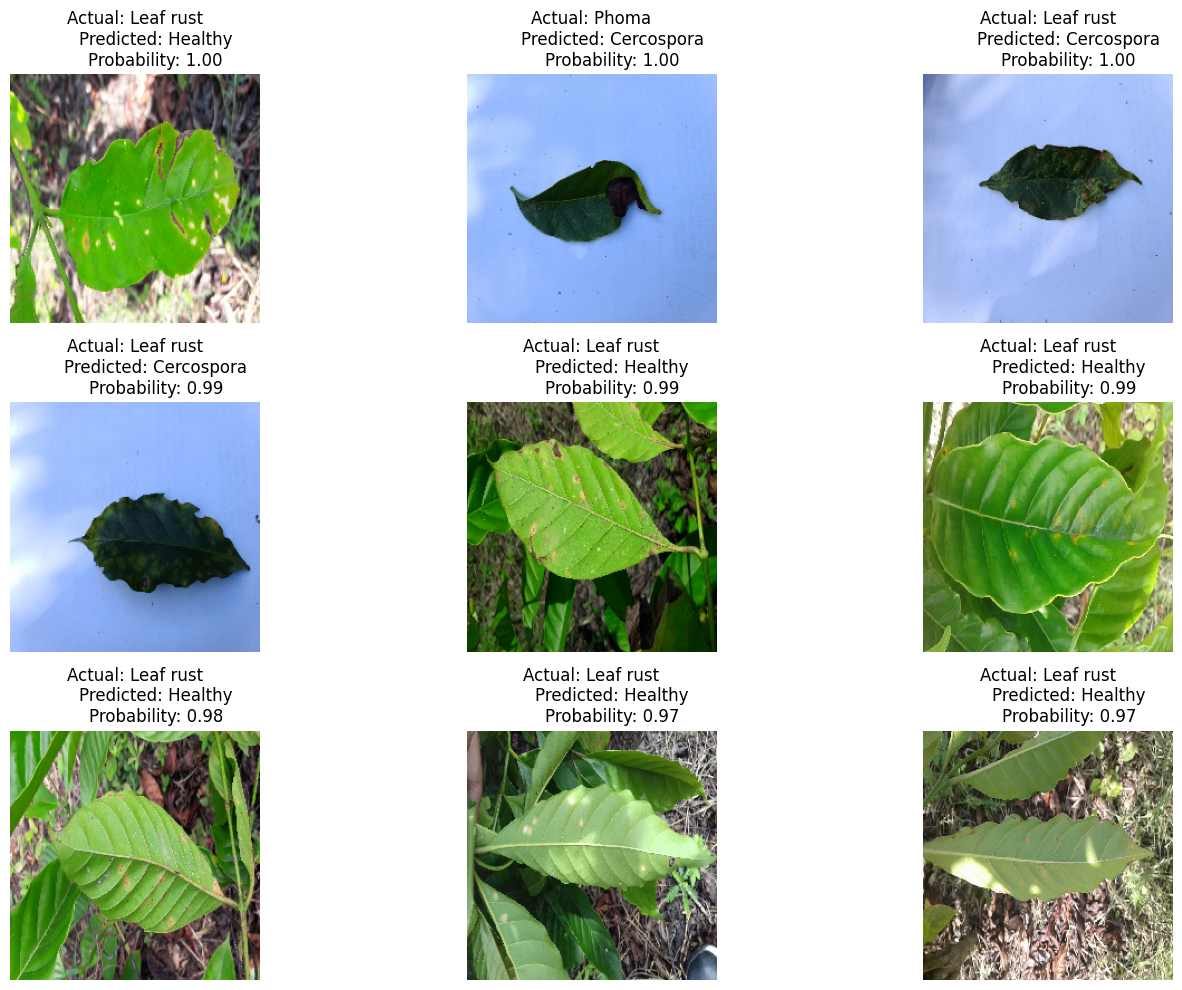

In [58]:
images_to_view = 9
start_index = 0

plt.figure(figsize=(15, 10))

for i, row in enumerate(top_wrong_pred[start_index:start_index + images_to_view].itertuples()):
    plt.subplot(3, 3, i + 1)
    
    # Load and preprocess the image
    img = load_and_prep_image(row.image_path, scale=False)
    
    # Unpack required row values
    _, _, _, _, pred_prob, y_true_classname, y_pred_classname, _ = row
    
    # Display the image
    plt.imshow(img / 255.0)
    plt.title(
        f"""Actual: {y_true_classname}
        Predicted: {y_pred_classname}
        Probability: {pred_prob:.2f}"""
    )
    plt.axis(False)

plt.tight_layout()
plt.show()

